In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data1=pd.read_csv('nnnn.csv',header=None,index_col=False)
data2=data1.drop([0],axis=1)
data2

X_train = data2.values[:,:3]
x=X_train
y_train = data2.values[:,4]
y=y_train
y_train1 = data2.values[:,3]
y1=y_train1

from sklearn.ensemble import RandomForestRegressor
#model_tan = RandomForestRegressor(n_estimators = 200, random_state = 0)
#model_tan.fit(x, y1)


#model_ep = RandomForestRegressor(n_estimators = 200, random_state = 0)
#model_ep.fit(x, y)



In [2]:
#import joblib
#filename = 'tan_model.sav'
#joblib.dump(model_tan, filename)

import joblib
model_tan = joblib.load('tan_model.sav')


In [3]:
import pandas as pd
with open('datatest.txt') as f:
    ep=[]
    tan=[]
    for line in f:
        if line[0]=='#':
            x=line.find('epsc')
            x1=line[x:].find(';')
            x2=line[x:]
            x3=x2[5:x1]
            
            e=line.find('tandel')
            e1=line[e:].find(';')
            e2=line[e:]
            e3=e2[7:e1]
            
            eps=x3
            tandel=e3
            ep=ep+[eps]
            tan=tan+[tandel]
        
        else:
            with open('newdata1.txt', 'a') as the_file:
                the_file.write(line)
f.close()
read_file = pd.read_csv (r'newdata1.txt',delimiter='\t')
read_file.to_csv (r'df.csv',index=False)

colnames=['frequency', 'SP_real', 'SP_imag', 'Z','W']
datat1=pd.read_csv('df.csv',names=colnames)
datat2=datat1.drop(['Z','W'],axis=1)
datat=datat2

In [6]:
datat1

,frequency,SP_real,SP_imag,Z,W
0,8.000,-0.209985,-0.612462,657.466907,0.0
1,8.004,-0.237025,-0.601959,656.797062,0.0
2,8.008,-0.263527,-0.590277,656.130101,0.0
3,8.012,-0.289439,-0.577445,655.466319,0.0
4,8.016,-0.314712,-0.563491,654.805536,0.0
...,...,...,...,...,...
996,11.984,0.489944,-0.054454,450.249088,0.0
997,11.988,0.487515,-0.070039,450.184988,0.0
998,11.992,0.484591,-0.085516,450.120980,0.0
999,11.996,0.481176,-0.100873,450.057048,0.0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


C:\Users\AliReza\Desktop\WEnvs\py3.7\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
101/101 [==============================] - 2s 3ms/step - loss: 0.0654
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_conve

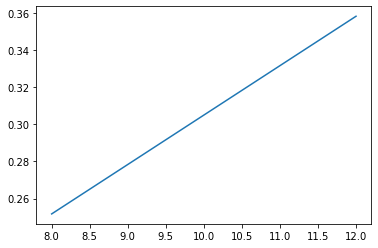

In [4]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense


def BuildModel():
    model = Sequential()
    model.add(Dense(128, input_dim=3,activation='relu')) 
    model.add(Dense(32, activation='relu')) 
    model.add(Dense(8,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model

BuildModel().summary()

tan_pred = model_tan.predict(datat.values)

from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
x=datat.values
tan_regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=50,batch_size=10)
tan_regressor.fit(x,tan_pred)

tan_pred1 = tan_regressor.predict(x)

import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)



b = estimate_coef(datat['frequency'], tan_pred1)
print("Estimated coefficients:\nb_0 = {} \
    \nb_1 = {}".format(b[0], b[1]))

y_pred = b[0] + b[1]*x
ypred=[]
for i in range(len(y_pred)):
    ypred=ypred+[y_pred[i][0]]
print(ypred)
plt.plot(datat['frequency'], ypred)
